# **Project UAS PPW**

## **Crawling Berita**
Perayapan data, atau data crawling adalah sebuah proses yang menggali jauh ke dalam world wide web atau target tertentu untuk mengambil data. Perayapan data juga didefinisikan sebagai proses otomatis untuk mengumpulkan dan mengindeks data dari berbagai sumber.

Crawling dilakukan pada website kompas.com. dengan mengambil data berita dengan 3 kategori sesuai keinginan user

Link website yang telah dibuat :
https://apk-uas-ppw-v1.streamlit.app/

In [ ]:
# Import Library
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib
import string

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def scraping_berita(halaman):
    # Daftar kategori yang dapat diisi custom sesuai kebutuhan
    kategori = ['Sports', 'Edukasi', 'Otomotif']

    a = 1

    with open('berita_kompas.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        # Looping untuk setiap kategori
        for kategori_terpilih in kategori:
            katakunci = kategori_terpilih

            for page in range(1, halaman + 1):
                url = f'https://indeks.kompas.com/?site={katakunci}&page={page}'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
                berita_list = list_berita.find_all('div', class_='article__list clearfix')

                for berita in berita_list:
                    link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                    date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                    headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text

                    if (katakunci == 'Sports'):
                      category = 'Sports'
                    elif (katakunci == 'Edukasi'):
                      category = 'Edukasi'
                    elif (katakunci == 'Otomotif'):
                      category = 'Otomotif'

                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find_all('div', class_='read__content')
                    content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                    artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                    print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                    a += 1

                    writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(23)

## **Data Preprocessing**

In [ ]:
# Membaca dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ppw/ppw_implementasi/tugas ppw/dataset/data_berita_kompas.csv')
data

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category
0,"Dampak Besar Kehadiran Messi di Amerika, MLS J...","11/12/2023, 11:30 WIB",KOMPAS.com - Kehadiran Lionel Messi memberikan...,Sports
1,"Ze Valente dan Irfan Bachdim Datang, Persik Ma...","11/12/2023, 10:30 WIB",KOMPAS.com - Kedatangan Ze Valente dan Irfan B...,Sports
2,Manchester United Tak Kunjung Temukan Konsiste...,"11/12/2023, 10:00 WIB",KOMPAS.com - Gary Neville menilai memecat Erik...,Sports
3,"SAC Indonesia 2023 Jawa Timur Tuntas Digelar, ...","11/12/2023, 08:30 WIB",KOMPAS.com - Kompetisi atletik pelajar terbesa...,Sports
4,"BIN Pasundan Juara Livoli Divisi Utama 2023, L...","11/12/2023, 07:56 WIB",KOMPAS.com - BIN Pasundan berhasil keluar seba...,Sports
...,...,...,...,...
1030,"Musim Hujan, Jangan Coba Terabas Jalanan yang ...","04/12/2023, 19:21 WIB","JAKARTA, KOMPAS.com - Kondisi cuaca saat ini m...",Otomotif
1031,"Jangan Cuek, Ketahui Batas Toleransi Ganti Oli...","04/12/2023, 19:12 WIB","TANGERANG, KOMPAS.com - Ganti oli motor secara...",Otomotif
1032,"Adu Desain, Lebih Ganteng Hyundai Ioniq 5 atau...","04/12/2023, 19:01 WIB","JAKARTA, KOMPAS.com - Pilihan mobil listrik ya...",Otomotif
1033,"Memasuki Musim Pancaroba, Perhatikan Karet Wip...","04/12/2023, 18:41 WIB","JAKARTA, KOMPAS.com - Saat ini sejumlah kota d...",Otomotif


In [ ]:
# Hitung jumlah kelas
kelas = data['Category'].value_counts()
kelas

Sports      345
Edukasi     345
Otomotif    345
Name: Category, dtype: int64

In [ ]:
# Cek data kosong
data.isnull().sum()

Judul_Artikel      0
Tanggal Publish    0
Content_Artikel    0
Category           0
dtype: int64

In [ ]:
# Cek data duplicate
data.duplicated().sum()

2

In [ ]:
data_new = data.drop_duplicates(subset='Content_Artikel', keep='first')
data_new = data_new.reset_index(drop=True)
print(f'Jumlah data = {len(data_new)}')

Jumlah data = 1033


In [ ]:
data_new

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category
0,"Dampak Besar Kehadiran Messi di Amerika, MLS J...","11/12/2023, 11:30 WIB",KOMPAS.com - Kehadiran Lionel Messi memberikan...,Sports
1,"Ze Valente dan Irfan Bachdim Datang, Persik Ma...","11/12/2023, 10:30 WIB",KOMPAS.com - Kedatangan Ze Valente dan Irfan B...,Sports
2,Manchester United Tak Kunjung Temukan Konsiste...,"11/12/2023, 10:00 WIB",KOMPAS.com - Gary Neville menilai memecat Erik...,Sports
3,"SAC Indonesia 2023 Jawa Timur Tuntas Digelar, ...","11/12/2023, 08:30 WIB",KOMPAS.com - Kompetisi atletik pelajar terbesa...,Sports
4,"BIN Pasundan Juara Livoli Divisi Utama 2023, L...","11/12/2023, 07:56 WIB",KOMPAS.com - BIN Pasundan berhasil keluar seba...,Sports
...,...,...,...,...
1028,"Musim Hujan, Jangan Coba Terabas Jalanan yang ...","04/12/2023, 19:21 WIB","JAKARTA, KOMPAS.com - Kondisi cuaca saat ini m...",Otomotif
1029,"Jangan Cuek, Ketahui Batas Toleransi Ganti Oli...","04/12/2023, 19:12 WIB","TANGERANG, KOMPAS.com - Ganti oli motor secara...",Otomotif
1030,"Adu Desain, Lebih Ganteng Hyundai Ioniq 5 atau...","04/12/2023, 19:01 WIB","JAKARTA, KOMPAS.com - Pilihan mobil listrik ya...",Otomotif
1031,"Memasuki Musim Pancaroba, Perhatikan Karet Wip...","04/12/2023, 18:41 WIB","JAKARTA, KOMPAS.com - Saat ini sejumlah kota d...",Otomotif


In [ ]:
data_new.duplicated().sum()

0

In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
data_new.to_csv('data_new_berita_kompas.csv', index=False)

### Clean data
Proses cleaning data digunakan untuk menghapus karakter tertentu dimana fungsi cleaning digunakan untuk membersihkan teks dalam kolom ‘Content_Artikel’. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.

In [ ]:
# membuat kolom baru dengan nama new_abstrak untuk data baru yang dipunctuation
data_new['clean_content'] = data_new['Content_Artikel'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
# Menghilangkan angka dari kolom 'new_abstrak'
data_new['clean_content'] = data_new['clean_content'].str.replace('\d+', '', regex=True)
data_new['clean_content']

0       kompascom  kehadiran lionel messi memberikan d...
1       kompascom  kedatangan ze valente dan irfan bac...
2       kompascom  gary neville menilai memecat erik t...
3       kompascom  kompetisi atletik pelajar terbesar ...
4       kompascom  bin pasundan berhasil keluar sebaga...
                              ...                        
1028    jakarta kompascom  kondisi cuaca saat ini mula...
1029    tangerang kompascom  ganti oli motor secara be...
1030    jakarta kompascom  pilihan mobil listrik yang ...
1031    jakarta kompascom  saat ini sejumlah kota di i...
1032    jakarta kompascom  pelumas atau oli mesin meru...
Name: clean_content, Length: 1033, dtype: object

### Tokenizing
Fungsi tokenizer digunakan untuk melakukan tokenisasi dan juga proses case folding pada teks yang telah dibersihkan. Ini mengubah teks menjadi token-token kata.

In [ ]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

data_new["tokenizing"] = data_new['clean_content'].apply(tokenizer)
data_new["tokenizing"]

0       [kompascom  kehadiran lionel messi memberikan ...
1       [kompascom  kedatangan ze valente dan irfan ba...
2       [kompascom  gary neville menilai memecat erik ...
3       [kompascom  kompetisi atletik pelajar terbesar...
4       [kompascom  bin pasundan berhasil keluar sebag...
                              ...                        
1028    [jakarta kompascom  kondisi cuaca saat ini mul...
1029    [tangerang kompascom  ganti oli motor secara b...
1030    [jakarta kompascom  pilihan mobil listrik yang...
1031    [jakarta kompascom  saat ini sejumlah kota di ...
1032    [jakarta kompascom  pelumas atau oli mesin mer...
Name: tokenizing, Length: 1033, dtype: object

In [ ]:
data_new

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category,clean_content,tokenizing
0,"Dampak Besar Kehadiran Messi di Amerika, MLS J...","11/12/2023, 11:30 WIB",KOMPAS.com - Kehadiran Lionel Messi memberikan...,Sports,kompascom kehadiran lionel messi memberikan d...,[kompascom kehadiran lionel messi memberikan ...
1,"Ze Valente dan Irfan Bachdim Datang, Persik Ma...","11/12/2023, 10:30 WIB",KOMPAS.com - Kedatangan Ze Valente dan Irfan B...,Sports,kompascom kedatangan ze valente dan irfan bac...,[kompascom kedatangan ze valente dan irfan ba...
2,Manchester United Tak Kunjung Temukan Konsiste...,"11/12/2023, 10:00 WIB",KOMPAS.com - Gary Neville menilai memecat Erik...,Sports,kompascom gary neville menilai memecat erik t...,[kompascom gary neville menilai memecat erik ...
3,"SAC Indonesia 2023 Jawa Timur Tuntas Digelar, ...","11/12/2023, 08:30 WIB",KOMPAS.com - Kompetisi atletik pelajar terbesa...,Sports,kompascom kompetisi atletik pelajar terbesar ...,[kompascom kompetisi atletik pelajar terbesar...
4,"BIN Pasundan Juara Livoli Divisi Utama 2023, L...","11/12/2023, 07:56 WIB",KOMPAS.com - BIN Pasundan berhasil keluar seba...,Sports,kompascom bin pasundan berhasil keluar sebaga...,[kompascom bin pasundan berhasil keluar sebag...
...,...,...,...,...,...,...
1028,"Musim Hujan, Jangan Coba Terabas Jalanan yang ...","04/12/2023, 19:21 WIB","JAKARTA, KOMPAS.com - Kondisi cuaca saat ini m...",Otomotif,jakarta kompascom kondisi cuaca saat ini mula...,[jakarta kompascom kondisi cuaca saat ini mul...
1029,"Jangan Cuek, Ketahui Batas Toleransi Ganti Oli...","04/12/2023, 19:12 WIB","TANGERANG, KOMPAS.com - Ganti oli motor secara...",Otomotif,tangerang kompascom ganti oli motor secara be...,[tangerang kompascom ganti oli motor secara b...
1030,"Adu Desain, Lebih Ganteng Hyundai Ioniq 5 atau...","04/12/2023, 19:01 WIB","JAKARTA, KOMPAS.com - Pilihan mobil listrik ya...",Otomotif,jakarta kompascom pilihan mobil listrik yang ...,[jakarta kompascom pilihan mobil listrik yang...
1031,"Memasuki Musim Pancaroba, Perhatikan Karet Wip...","04/12/2023, 18:41 WIB","JAKARTA, KOMPAS.com - Saat ini sejumlah kota d...",Otomotif,jakarta kompascom saat ini sejumlah kota di i...,[jakarta kompascom saat ini sejumlah kota di ...


In [ ]:
# menggabungkan kata
data_new['final_content'] = data_new['tokenizing'].apply(lambda x: ' '.join(x))
data_new

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category,clean_content,tokenizing,final_content
0,"Dampak Besar Kehadiran Messi di Amerika, MLS J...","11/12/2023, 11:30 WIB",KOMPAS.com - Kehadiran Lionel Messi memberikan...,Sports,kompascom kehadiran lionel messi memberikan d...,[kompascom kehadiran lionel messi memberikan ...,kompascom kehadiran lionel messi memberikan d...
1,"Ze Valente dan Irfan Bachdim Datang, Persik Ma...","11/12/2023, 10:30 WIB",KOMPAS.com - Kedatangan Ze Valente dan Irfan B...,Sports,kompascom kedatangan ze valente dan irfan bac...,[kompascom kedatangan ze valente dan irfan ba...,kompascom kedatangan ze valente dan irfan bac...
2,Manchester United Tak Kunjung Temukan Konsiste...,"11/12/2023, 10:00 WIB",KOMPAS.com - Gary Neville menilai memecat Erik...,Sports,kompascom gary neville menilai memecat erik t...,[kompascom gary neville menilai memecat erik ...,kompascom gary neville menilai memecat erik t...
3,"SAC Indonesia 2023 Jawa Timur Tuntas Digelar, ...","11/12/2023, 08:30 WIB",KOMPAS.com - Kompetisi atletik pelajar terbesa...,Sports,kompascom kompetisi atletik pelajar terbesar ...,[kompascom kompetisi atletik pelajar terbesar...,kompascom kompetisi atletik pelajar terbesar ...
4,"BIN Pasundan Juara Livoli Divisi Utama 2023, L...","11/12/2023, 07:56 WIB",KOMPAS.com - BIN Pasundan berhasil keluar seba...,Sports,kompascom bin pasundan berhasil keluar sebaga...,[kompascom bin pasundan berhasil keluar sebag...,kompascom bin pasundan berhasil keluar sebaga...
...,...,...,...,...,...,...,...
1028,"Musim Hujan, Jangan Coba Terabas Jalanan yang ...","04/12/2023, 19:21 WIB","JAKARTA, KOMPAS.com - Kondisi cuaca saat ini m...",Otomotif,jakarta kompascom kondisi cuaca saat ini mula...,[jakarta kompascom kondisi cuaca saat ini mul...,jakarta kompascom kondisi cuaca saat ini mula...
1029,"Jangan Cuek, Ketahui Batas Toleransi Ganti Oli...","04/12/2023, 19:12 WIB","TANGERANG, KOMPAS.com - Ganti oli motor secara...",Otomotif,tangerang kompascom ganti oli motor secara be...,[tangerang kompascom ganti oli motor secara b...,tangerang kompascom ganti oli motor secara be...
1030,"Adu Desain, Lebih Ganteng Hyundai Ioniq 5 atau...","04/12/2023, 19:01 WIB","JAKARTA, KOMPAS.com - Pilihan mobil listrik ya...",Otomotif,jakarta kompascom pilihan mobil listrik yang ...,[jakarta kompascom pilihan mobil listrik yang...,jakarta kompascom pilihan mobil listrik yang ...
1031,"Memasuki Musim Pancaroba, Perhatikan Karet Wip...","04/12/2023, 18:41 WIB","JAKARTA, KOMPAS.com - Saat ini sejumlah kota d...",Otomotif,jakarta kompascom saat ini sejumlah kota di i...,[jakarta kompascom saat ini sejumlah kota di ...,jakarta kompascom saat ini sejumlah kota di i...


## **Ekstraksi Fitur**
Menggunakan TF-IDF yaitu metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(data_new['final_content'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_data_content = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Cetak DataFrame TF-IDF
tfidf_data_content

,aa,aafxs,aal,aan,aang,aarc,aaron,aas,aau,abad,...,zulpata,zurqoni,zuzu,zvezda,zxr,zxrr,zz,équipe,être,último
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
tfidf_data_content.to_csv('tfidf_data_content.csv', index=False)

In [ ]:
data_label = data['Category']
data_label

0         Sports
1         Sports
2         Sports
3         Sports
4         Sports
          ...   
1030    Otomotif
1031    Otomotif
1032    Otomotif
1033    Otomotif
1034    Otomotif
Name: Category, Length: 1035, dtype: object

In [ ]:
data_tfidf = pd.concat([tfidf_data_content, data_label],axis=1)
data_tfidf

,aa,aafxs,aal,aan,aang,aarc,aaron,aas,aau,abad,...,zurqoni,zuzu,zvezda,zxr,zxrr,zz,équipe,être,último,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otomotif


In [ ]:
# Menghapus baris yang memiliki nilai NaN di semua kolom
data_tfidf.isna()
data_tfidf.dropna(subset='all', inplace=True)

In [ ]:
data_tfidf

,aa,aafxs,aal,aan,aang,aarc,aaron,aas,aau,abad,...,zurqoni,zuzu,zvezda,zxr,zxrr,zz,équipe,être,último,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif


In [ ]:
data_tfidf.to_csv('data_tfidf_split.csv', index=False)

## **LDA**
Latent Dirichlet Allocation (LDA) adalah model probabilistik generatif dari koleksi data diskrit seperti korpus teks. Ide dasarnya adalah bahwa dokumen direpresentasikan sebagai campuran acak atas topik laten (tidak terlihat). LDA merupakan model Bayesian hirarki tiga tingkat, di mana setiap item koleksi dimodelkan sebagai campuran terbatas atas serangkaian set topik. Setiap topik dimodelkan sebagai campuran tak terbatas melalui set yang mendasari probabilitas topik. Dalam konteks pembuatan model teks, probabilitas topik memberikan representasi eksplisit dari sebuah dokumen.

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

In [ ]:
#Train and Test split
X = data_tfidf.drop('Category', axis=1)
y = data_tfidf['Category']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
k = 3
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(X_train)
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

,Topik 1,Topik 2,Topik 3
0,0.008862,0.982275,0.008863
1,0.011825,0.976347,0.011828
2,0.011525,0.976949,0.011526
3,0.009241,0.706022,0.284736
4,0.008429,0.008432,0.983139
...,...,...,...
821,0.010337,0.979326,0.010337
822,0.011664,0.976672,0.011664
823,0.008886,0.982228,0.008887
824,0.009679,0.980642,0.009679


In [ ]:
proporsi_topik_dokumen_df.to_csv('data_topik.csv', index=False)

In [ ]:
data_topik = pd.concat([proporsi_topik_dokumen_df, data_label],axis=1)
data_topik

,Topik 1,Topik 2,Topik 3,Category
0,0.008862,0.982275,0.008863,Sports
1,0.011825,0.976347,0.011828,Sports
2,0.011525,0.976949,0.011526,Sports
3,0.009241,0.706022,0.284736,Sports
4,0.008429,0.008432,0.983139,Sports
...,...,...,...,...
1030,NaN,NaN,NaN,Otomotif
1031,NaN,NaN,NaN,Otomotif
1032,NaN,NaN,NaN,Otomotif
1033,NaN,NaN,NaN,Otomotif


In [ ]:
data_topik.isna()
data_topik.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Category'],inplace = True)
# Cek kembali nilai NaN
data_topik

,Topik 1,Topik 2,Topik 3,Category
0,0.008862,0.982275,0.008863,Sports
1,0.011825,0.976347,0.011828,Sports
2,0.011525,0.976949,0.011526,Sports
3,0.009241,0.706022,0.284736,Sports
4,0.008429,0.008432,0.983139,Sports
...,...,...,...,...
821,0.010337,0.979326,0.010337,Otomotif
822,0.011664,0.976672,0.011664,Otomotif
823,0.008886,0.982228,0.008887,Otomotif
824,0.009679,0.980642,0.009679,Otomotif


In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
data_topik.to_csv('data_topik.csv', index=False)

## **Modelling**

In [ ]:
#Train and Test split
X_topik = data_topik.drop('Category', axis=1)
y_topik = data_topik['Category']
X_topik_train,X_topik_test,y_topik_train,y_topik_test= train_test_split(X_topik,y_topik,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Model RandomForest
model_rfc = RandomForestClassifier(n_estimators=100)
# Latih model
model_rfc.fit(X_topik_train, y_topik_train)
# Prediksi pada data uji
predictions = model_rfc.predict(X_topik_test)
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy_rfc = accuracy_score(y_topik_test, predictions)
print(f'Akurasi: {accuracy_rfc}')

Akurasi: 0.4397590361445783


In [ ]:
# naive bayes
nb = GaussianNB()
nb.fit(X_topik_train, y_topik_train)
Y_prediction = nb.predict(X_topik_test)
accuracy_rf=round(accuracy_score(y_topik_test,Y_prediction)* 100, 2)
acc_nb = round(nb.score(X_topik_train, y_topik_train) * 100, 2)
print('akurasi nb', acc_nb)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_topik_train, y_topik_train)
Y_pred_knn = knn.predict(X_topik_test)
accuracy_knn=round(accuracy_score(y_topik_test,Y_pred_knn)* 100, 2)
acc_knn = round(knn.score(X_topik_train, y_topik_train) * 100, 2)

print('akurasi knn', acc_knn)

akurasi nb 45.76
akurasi knn 68.64


In [ ]:
from sklearn import svm
C = 1.0
gamma = 0.1
kernel = 'rbf'
model_svm = svm.SVC(C=C, gamma=gamma, kernel=kernel)
model_svm.fit(X_topik_train, y_topik_train)
# Prediksi pada data uji
predictions = model_svm.predict(X_topik_test)
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
acc_svm = accuracy_score(y_topik_test, predictions)
print(f'Akurasi: {acc_svm}')

Akurasi: 0.4578313253012048


### Save Model

In [ ]:
# Simpan Model
from sklearn import model_selection
import pickle

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_topik_train, y_topik_train)
# save the model to disk
filename = 'finalized_model_knn.pkl'
pickle.dump(knn, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# apply the whole pipeline to data
dataArray = [0.011317,	0.011317,	0.977366]
pred = loaded_model.predict([dataArray])
print('hasil prediksi masuk ke kelas = ',pred)

hasil prediksi masuk ke kelas =  ['Otomotif']


In [ ]:
from sklearn import model_selection
import pickle
# Model RandomForest
model_rfc = RandomForestClassifier(n_estimators=100)
# Latih model
model_rfc.fit(X_topik_train, y_topik_train)

# save the model to disk
filename = 'finalized_model_randomforest.pkl'
pickle.dump(model_rfc, open(filename, 'wb'))

In [ ]:
from sklearn import model_selection
import pickle
nb = GaussianNB()
nb.fit(X_topik_train, y_topik_train)

# save the model to disk
filename = 'model_naivebayes.pkl'
pickle.dump(nb, open(filename, 'wb'))

## **Evaluasi**

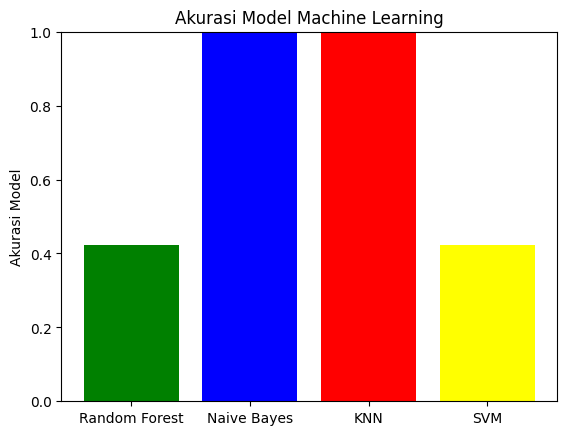

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Naive Bayes', 'KNN', 'SVM']
accuracies = [accuracy_rfc, acc_nb, acc_knn, acc_svm]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red', 'yellow'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()

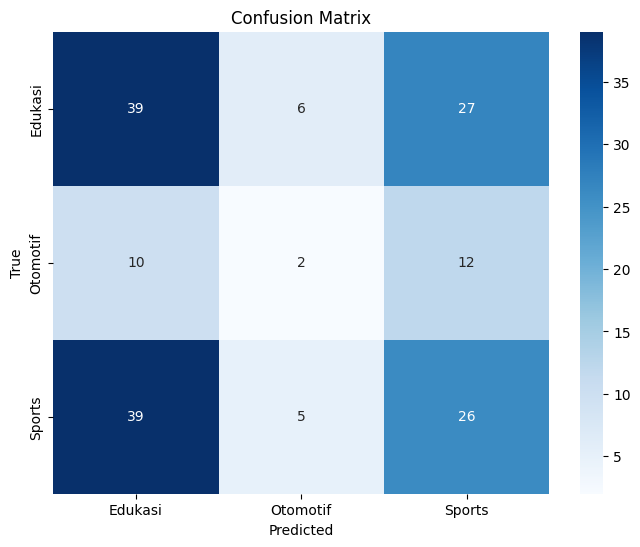

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_topik_test,Y_pred_knn)
plot_confusion_matrix(cm)

## Text klasifikasi

In [ ]:
data_new = data_new.rename(columns={'final_content': 'summary'})
data_new

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category,clean_content,tokenizing,summary
0,"Dampak Besar Kehadiran Messi di Amerika, MLS J...","11/12/2023, 11:30 WIB",KOMPAS.com - Kehadiran Lionel Messi memberikan...,Sports,kompascom kehadiran lionel messi memberikan d...,[kompascom kehadiran lionel messi memberikan ...,kompascom kehadiran lionel messi memberikan d...
1,"Ze Valente dan Irfan Bachdim Datang, Persik Ma...","11/12/2023, 10:30 WIB",KOMPAS.com - Kedatangan Ze Valente dan Irfan B...,Sports,kompascom kedatangan ze valente dan irfan bac...,[kompascom kedatangan ze valente dan irfan ba...,kompascom kedatangan ze valente dan irfan bac...
2,Manchester United Tak Kunjung Temukan Konsiste...,"11/12/2023, 10:00 WIB",KOMPAS.com - Gary Neville menilai memecat Erik...,Sports,kompascom gary neville menilai memecat erik t...,[kompascom gary neville menilai memecat erik ...,kompascom gary neville menilai memecat erik t...
3,"SAC Indonesia 2023 Jawa Timur Tuntas Digelar, ...","11/12/2023, 08:30 WIB",KOMPAS.com - Kompetisi atletik pelajar terbesa...,Sports,kompascom kompetisi atletik pelajar terbesar ...,[kompascom kompetisi atletik pelajar terbesar...,kompascom kompetisi atletik pelajar terbesar ...
4,"BIN Pasundan Juara Livoli Divisi Utama 2023, L...","11/12/2023, 07:56 WIB",KOMPAS.com - BIN Pasundan berhasil keluar seba...,Sports,kompascom bin pasundan berhasil keluar sebaga...,[kompascom bin pasundan berhasil keluar sebag...,kompascom bin pasundan berhasil keluar sebaga...
...,...,...,...,...,...,...,...
1028,"Musim Hujan, Jangan Coba Terabas Jalanan yang ...","04/12/2023, 19:21 WIB","JAKARTA, KOMPAS.com - Kondisi cuaca saat ini m...",Otomotif,jakarta kompascom kondisi cuaca saat ini mula...,[jakarta kompascom kondisi cuaca saat ini mul...,jakarta kompascom kondisi cuaca saat ini mula...
1029,"Jangan Cuek, Ketahui Batas Toleransi Ganti Oli...","04/12/2023, 19:12 WIB","TANGERANG, KOMPAS.com - Ganti oli motor secara...",Otomotif,tangerang kompascom ganti oli motor secara be...,[tangerang kompascom ganti oli motor secara b...,tangerang kompascom ganti oli motor secara be...
1030,"Adu Desain, Lebih Ganteng Hyundai Ioniq 5 atau...","04/12/2023, 19:01 WIB","JAKARTA, KOMPAS.com - Pilihan mobil listrik ya...",Otomotif,jakarta kompascom pilihan mobil listrik yang ...,[jakarta kompascom pilihan mobil listrik yang...,jakarta kompascom pilihan mobil listrik yang ...
1031,"Memasuki Musim Pancaroba, Perhatikan Karet Wip...","04/12/2023, 18:41 WIB","JAKARTA, KOMPAS.com - Saat ini sejumlah kota d...",Otomotif,jakarta kompascom saat ini sejumlah kota di i...,[jakarta kompascom saat ini sejumlah kota di ...,jakarta kompascom saat ini sejumlah kota di i...


In [ ]:
new_df_sm = data_new['summary']
new_df_sm

0       kompascom  kehadiran lionel messi memberikan d...
1       kompascom  kedatangan ze valente dan irfan bac...
2       kompascom  gary neville menilai memecat erik t...
3       kompascom  kompetisi atletik pelajar terbesar ...
4       kompascom  bin pasundan berhasil keluar sebaga...
                              ...                        
1028    jakarta kompascom  kondisi cuaca saat ini mula...
1029    tangerang kompascom  ganti oli motor secara be...
1030    jakarta kompascom  pilihan mobil listrik yang ...
1031    jakarta kompascom  saat ini sejumlah kota di i...
1032    jakarta kompascom  pelumas atau oli mesin meru...
Name: summary, Length: 1033, dtype: object

In [ ]:
data_final_sm = pd.concat([new_df_sm, data_label],axis=1)
data_final_sm

,summary,Category
0,kompascom kehadiran lionel messi memberikan d...,Sports
1,kompascom kedatangan ze valente dan irfan bac...,Sports
2,kompascom gary neville menilai memecat erik t...,Sports
3,kompascom kompetisi atletik pelajar terbesar ...,Sports
4,kompascom bin pasundan berhasil keluar sebaga...,Sports
...,...,...
1030,jakarta kompascom pilihan mobil listrik yang ...,Otomotif
1031,jakarta kompascom saat ini sejumlah kota di i...,Otomotif
1032,jakarta kompascom pelumas atau oli mesin meru...,Otomotif
1033,NaN,Otomotif


In [ ]:
data_final_sm.isna()
data_final_sm.dropna(subset=['summary', 'Category'],inplace = True)
# Cek kembali nilai NaN
data_final_sm

,summary,Category
0,kompascom kehadiran lionel messi memberikan d...,Sports
1,kompascom kedatangan ze valente dan irfan bac...,Sports
2,kompascom gary neville menilai memecat erik t...,Sports
3,kompascom kompetisi atletik pelajar terbesar ...,Sports
4,kompascom bin pasundan berhasil keluar sebaga...,Sports
...,...,...
1028,jakarta kompascom kondisi cuaca saat ini mula...,Otomotif
1029,tangerang kompascom ganti oli motor secara be...,Otomotif
1030,jakarta kompascom pilihan mobil listrik yang ...,Otomotif
1031,jakarta kompascom saat ini sejumlah kota di i...,Otomotif


In [ ]:
data_final_sm.to_csv('data_final_sm.csv', index=False)

In [ ]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(data_final_sm['summary']).toarray()
y = data_final_sm["Category"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.964516129032258


In [ ]:
data_final_sm['summary'][1028]

'jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang m

In [ ]:
new_data = ["jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang mesin seperti dari knalpot dan juga lubang udara kalau air sudah masuk mesin bisa rusak karena kemasukan benda asing selain udara dan bensin baca juga akhir tahun diskon kia sonet sentuh rp  jutaan  kemudian buat lubang saat jalanan banjir tentu jadi tidak terlihat dalamnya juga tidak ketahuan biasanya kalau sudah terjebak pengendara bisa jatuh dan melukai diri sendiri potensi luka pasti ada mas jadi memang sebaiknya jangan memaksakan kata agus jadi lebih baik lagi buat mencari jalan alternatif kalau misalnya tidak mau melewati jalanan banjir sabar saja jangan menerabas sebelum tau konsekuensinya apa"]
new_data_summary = tokenizer(new_data[0])
new_data_summary

['jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang 

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary[0]]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Otomotif'

## Modif dengan Topik

In [ ]:
def create_topic_proportion_df(X_summary, k, alpha, beta):
    lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)

    proporsi_topik_dokumen = lda_model.fit_transform(X_summary)

    nama_kolom_topik = [f'Topik {i+1}' for i in range(k)]

    proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=nama_kolom_topik)

    return proporsi_topik_dokumen_df

In [ ]:
vectorizer_summary = TfidfVectorizer()
tfidf_text = vectorizer_summary.fit_transform(data_final_sm['summary']).toarray()
X_summary = create_topic_proportion_df(tfidf_text, 6, 0.1, 0.2)
y = data_final_sm["Category"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()
# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)
# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9612903225806452


In [ ]:
data_final_sm['summary'][1028]

'jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang m

In [ ]:
new_data = ["jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang mesin seperti dari knalpot dan juga lubang udara kalau air sudah masuk mesin bisa rusak karena kemasukan benda asing selain udara dan bensin baca juga akhir tahun diskon kia sonet sentuh rp  jutaan  kemudian buat lubang saat jalanan banjir tentu jadi tidak terlihat dalamnya juga tidak ketahuan biasanya kalau sudah terjebak pengendara bisa jatuh dan melukai diri sendiri potensi luka pasti ada mas jadi memang sebaiknya jangan memaksakan kata agus jadi lebih baik lagi buat mencari jalan alternatif kalau misalnya tidak mau melewati jalanan banjir sabar saja jangan menerabas sebelum tau konsekuensinya apa"]
new_data_summary = tokenizer(new_data[0])
new_data_summary

['jakarta kompascom  kondisi cuaca saat ini mulai masuk ke musim hujan banyak kondisi jalan yang tergenang air bahkan sampai banjir saat hujan turun dengan deras kalau bertemu dengan jalanan yang tergenang air sebenarnya jangan coba memaksa melewati jalan tersebut walau memang ada saja keperluan yang kepepet atau jadi jalan satusatunya head of safety riding promotion wahana agus sani mengatakan ada saja risiko pengendara kalau memaksa melewati jalanan banjir pakai motor baca juga daftar harga motor bebek per desember  kompascomm elgana mubarokah banjir setinggi  sentimeter hingga  meter merendam  rw di kampung bojongasih desa dayeuhkolot kecamatan dayeuhkolot kabupaten bandung jawa barat pada jumat  banjir tersebut akibat luapa sungai citarum yang tak jauh dari pemukiman warga risiko melewati jalan banjir cukup tinggi berpotensi mogok di tengah banjir atau masuk ke dalam lubang yang ada di jalan kata agus kepada kompascom belum lama ini soal mogok banyak kemungkinan air masuk ke ruang 

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary[0]]).toarray()
topik_tfidf_x = create_topic_proportion_df(tfidf_Xnew_summary, 6, 0.1, 0.2)
topik_tfidf_x

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6
0,0.009589,0.009589,0.009589,0.009589,0.009589,0.952055


In [ ]:
pred_gnb_summary = gnb_summary.predict(topik_tfidf_x)
pred_gnb_summary[0]

'Edukasi'

In [ ]:
# Simpan Model
from sklearn import model_selection
import pickle

# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()
# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)
# save the model to disk
filename = 'model_naivebayes.pkl'
pickle.dump(knn, open(filename, 'wb'))
